# Tipos de variáveis

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
camaras = pd.read_csv('https://github.com/jtrecenti/main-cdad2/releases/download/data/camaras.csv')

In [9]:
camaras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   processo                10000 non-null  object 
 1   assunto                 10000 non-null  object 
 2   camara                  10000 non-null  object 
 3   relator                 10000 non-null  object 
 4   origem                  10000 non-null  object 
 5   comarca                 10000 non-null  object 
 6   polo_mp                 10000 non-null  object 
 7   decisao                 10000 non-null  object 
 8   unanimidade             10000 non-null  object 
 9   dt_publicacao           9999 non-null   object 
 10  ementa                  10000 non-null  object 
 11  tempo                   9999 non-null   float64
 12  rel_idade               8609 non-null   float64
 13  rel_id_municipio_nasc   8681 non-null   float64
 14  rel_faculdade_direito   8686 non-null  

In [10]:
camaras.relator.head(30)

0               MÁRIO DEVIENNE FERRAZ
1              ALBERTO ANDERSON FILHO
2              FERNANDO TORRES GARCIA
3               NELSON FONSECA JÚNIOR
4                     ALEX ZILENOVSKI
5                         PAULO ROSSI
6                        DAMIÃO COGAN
7     CÉSAR AUGUSTO ANDRADE DE CASTRO
8                      IVO DE ALMEIDA
9                        SÉRGIO RIBAS
10              NELSON FONSECA JÚNIOR
11             ALCIDES MALOSSI JUNIOR
12                        IVANA DAVID
13                  ALEXANDRE ALMEIDA
14                  JUSCELINO BATISTA
15     JOSÉ VITOR TEIXEIRA DE FREITAS
16                    WALTER DA SILVA
17                        PAULO ROSSI
18             LUIZ FERNANDO VAGGIONE
19                     WILLIAN CAMPOS
20                       FÁTIMA GOMES
21                       NUEVO CAMPOS
22             MIGUEL MARQUES E SILVA
23                      MENS DE MELLO
24                HERMANN HERSCHANDER
25                         ELY AMIOKA
26          

In [11]:
camaras.value_counts('relator')

relator
MENS DE MELLO                          163
CAMILO LÉLLIS                          151
MARCOS CORREA                          150
GILBERTO CRUZ                          147
IVANA DAVID                            144
                                      ... 
ERIKA SOARES DE AZEVEDO MASCARENHAS      8
CHRISTIANO JORGE                         8
KENARIK BOUJIKIAN                        5
LUÍS GERALDO LANFREDI                    3
NOGUEIRA NASCIMENTO                      1
Name: count, Length: 133, dtype: int64

Note que temos câmaras ordinárias e extraordinárias. O que são as câmaras extraordinárias? Elas ainda existem?

<Axes: xlabel='count', ylabel='camara'>

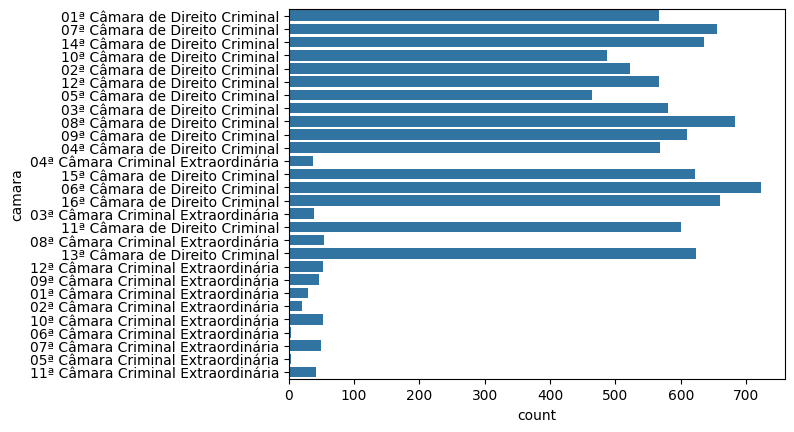

In [12]:
sns.countplot(data=camaras, y='camara')

In [13]:
camaras.value_counts('camara', normalize=True)

camara
06ª Câmara de Direito Criminal        0.0723
08ª Câmara de Direito Criminal        0.0683
16ª Câmara de Direito Criminal        0.0660
07ª Câmara de Direito Criminal        0.0655
14ª Câmara de Direito Criminal        0.0636
13ª Câmara de Direito Criminal        0.0624
15ª Câmara de Direito Criminal        0.0621
09ª Câmara de Direito Criminal        0.0610
11ª Câmara de Direito Criminal        0.0601
03ª Câmara de Direito Criminal        0.0581
04ª Câmara de Direito Criminal        0.0568
12ª Câmara de Direito Criminal        0.0567
01ª Câmara de Direito Criminal        0.0566
02ª Câmara de Direito Criminal        0.0523
10ª Câmara de Direito Criminal        0.0487
05ª Câmara de Direito Criminal        0.0464
08ª Câmara Criminal Extraordinária    0.0054
10ª Câmara Criminal Extraordinária    0.0053
12ª Câmara Criminal Extraordinária    0.0053
07ª Câmara Criminal Extraordinária    0.0049
09ª Câmara Criminal Extraordinária    0.0047
11ª Câmara Criminal Extraordinária    0.0042
03ª

In [14]:
camaras_ordinarias = camaras[camaras.camara.str.contains('Direito Criminal')]

In [15]:
camaras_ordinarias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   processo                9569 non-null   object 
 1   assunto                 9569 non-null   object 
 2   camara                  9569 non-null   object 
 3   relator                 9569 non-null   object 
 4   origem                  9569 non-null   object 
 5   comarca                 9569 non-null   object 
 6   polo_mp                 9569 non-null   object 
 7   decisao                 9569 non-null   object 
 8   unanimidade             9569 non-null   object 
 9   dt_publicacao           9568 non-null   object 
 10  ementa                  9569 non-null   object 
 11  tempo                   9568 non-null   float64
 12  rel_idade               8194 non-null   float64
 13  rel_id_municipio_nasc   8261 non-null   float64
 14  rel_faculdade_direito   8266 non-null   objec

In [16]:
camaras_ordinarias.value_counts('camara')

camara
06ª Câmara de Direito Criminal    723
08ª Câmara de Direito Criminal    683
16ª Câmara de Direito Criminal    660
07ª Câmara de Direito Criminal    655
14ª Câmara de Direito Criminal    636
13ª Câmara de Direito Criminal    624
15ª Câmara de Direito Criminal    621
09ª Câmara de Direito Criminal    610
11ª Câmara de Direito Criminal    601
03ª Câmara de Direito Criminal    581
04ª Câmara de Direito Criminal    568
12ª Câmara de Direito Criminal    567
01ª Câmara de Direito Criminal    566
02ª Câmara de Direito Criminal    523
10ª Câmara de Direito Criminal    487
05ª Câmara de Direito Criminal    464
Name: count, dtype: int64

In [17]:
camaras_ordinarias.value_counts('polo_mp')

polo_mp
Passivo    8788
Ativo       781
Name: count, dtype: int64

In [18]:
camaras_ordinarias.value_counts('decisao')

decisao
Negaram                 5042
Parcialmente            3550
Provido                  686
Punibilidade Extinta     217
Outros                    59
Não conhecido             15
Name: count, dtype: int64

In [19]:
contagens = (
  camaras_ordinarias
  .value_counts(['polo_mp', 'decisao'])
  .reset_index(name = 'count')
  .sort_values(['polo_mp', 'count'], ascending=[True, False])
)

contagens

,polo_mp,decisao,count
3,Ativo,Negaram,345
4,Ativo,Provido,275
6,Ativo,Parcialmente,144
9,Ativo,Outros,11
10,Ativo,Punibilidade Extinta,5
11,Ativo,Não conhecido,1
0,Passivo,Negaram,4697
1,Passivo,Parcialmente,3406
2,Passivo,Provido,411
5,Passivo,Punibilidade Extinta,212


In [20]:
contagens['prop'] = contagens['count'] / contagens.groupby('polo_mp')['count'].transform('sum')

contagens

,polo_mp,decisao,count,prop
3,Ativo,Negaram,345,0.441741
4,Ativo,Provido,275,0.352113
6,Ativo,Parcialmente,144,0.184379
9,Ativo,Outros,11,0.014085
10,Ativo,Punibilidade Extinta,5,0.006402
11,Ativo,Não conhecido,1,0.001280
0,Passivo,Negaram,4697,0.534479
1,Passivo,Parcialmente,3406,0.387574
2,Passivo,Provido,411,0.046768
5,Passivo,Punibilidade Extinta,212,0.024124
